# OBJECTIVE: 다음 분기에 어떤 게임을 설계해야 하는가

산업과 데이터의 **전반적인 이해를 위해 모든 데이터**를 사용하여 분석하나    
게임 산업은 빠르게 변화하는 산업인만큼 **다음 출시 게임 결정을 위해서는 근 10년간의 데이터**를 사용한다







    
**어떤 장르의 게임을 출시해야 하는가?**  
- 최근 트렌드의 맞는 장르 
- 장르별 출고량 출시량   
- 지역별 선호하는 장르  
- 지역별 출고량 영향력       
- 기업 독점률이 낮은 장르

**어느 플랫폼에 출시해야 하는가?**    
- 지원되는 플랫폼 수 별 평균 출고량
- 각 플랫폼별 게임산업 지배율

**최근 10년간 1 Milion이상 출고된 게임**    
- 장르별 출고량과 출시량
- 지역별 출고량 비교

In [312]:
#from google.colab import files
#uploaded = files.upload()

# Custom Functions
데이터 분석에 필요한 커스텀 함수

In [313]:
def adjYear(year):
  if year < 22:
    year = year + 2000
  elif year < 100:
    year = year + 1900
  return year

def adjSales(sales):
  for i, sale in enumerate(sales):
    if 'K' in sale.upper():
      sale = sale.upper().replace('K', '')
      sale = float(sale)
      sale = sale / 1000
      sales[i] = sale
    elif 'M' in sale.upper():
      sale = sale.upper().replace('M', '')
      sales[i] = sale
  return sales

def group_by_5year(year):
  if year < 2000:   #1980~ 1999는 데이터 수가 적음으로 하나로 묶음
    return 1980
  elif year < 2005:
    return 2000
  elif year < 2010:
    return 2005
  elif year < 2015:
    return 2010
  else:
    return 2015

def getRegionSum(df):
  sums = []
  sums.append(df['NA_Sales'].sum())
  sums.append(df['EU_Sales'].sum())
  sums.append(df['JP_Sales'].sum())
  sums.append(df['Other_Sales'].sum())
  return sums
    

# 데이터 전처리

코드로 진행가능한 부분은 진행 후, 이후 일부 수작업 진행하여 파일 업데이트

In [314]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/updated_game.csv')

# Clearing 
df = df.drop(columns=['Unnamed: 0'])
#df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Genre'] = df['Genre'].fillna('Unknown')

df['Year'] = df['Year'].apply(adjYear)
# df['Year'] = df['Year'].fillna(-1) -> effect on mean of year

df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].apply(adjSales).apply(pd.to_numeric)
df['Total_Sales'] = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)


print(df.dtypes)
print(df.describe())
print(df.isna().sum())

df

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total_Sales    float64
dtype: object
               Year      NA_Sales  ...   Other_Sales   Total_Sales
count  16327.000000  16598.000000  ...  16598.000000  16598.000000
mean    2006.406443      0.264667  ...      0.048063      0.537164
std        5.828981      0.816683  ...      0.188588      1.555151
min     1980.000000      0.000000  ...      0.000000      0.000000
25%     2003.000000      0.000000  ...      0.000000      0.060000
50%     2007.000000      0.080000  ...      0.010000      0.170000
75%     2010.000000      0.240000  ...      0.040000      0.470000
max     2020.000000     41.490000  ...     10.570000     82.740000

[8 rows x 6 columns]
Name             0
Platform         0
Year           271
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 각 장르가 게임산업에 차지하는 비중 

새로운 게임의 장르를 고르기전 전체 게임산업의 장르들에 대한 분석이 필요.

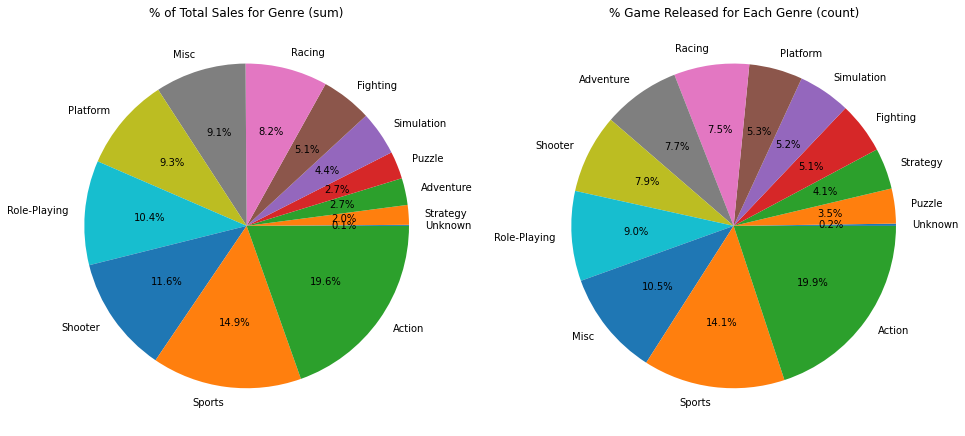

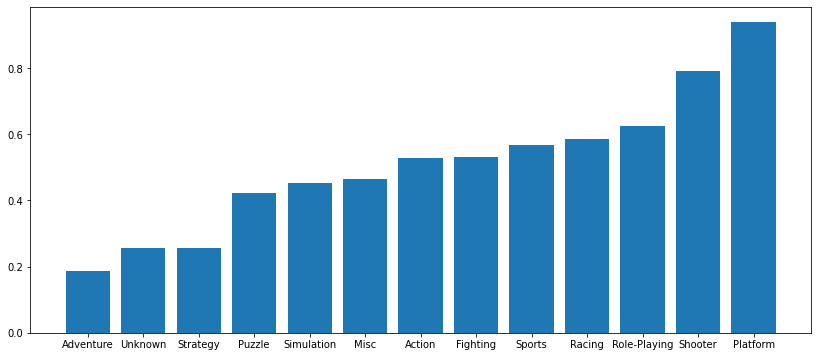

In [315]:
# group by genre, sum/count the values
genre_group_sum_df = df.groupby(by=['Genre']).sum().sort_values(by=['Total_Sales']).reset_index()
genre_group_count_df = df.groupby(by=['Genre']).count().sort_values(by=['Total_Sales']).reset_index()
genre_group_mean_df = df.groupby(by=['Genre']).mean().sort_values(by=['Total_Sales']).reset_index()

# Visualize
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,16)) 

# Genre_Sale / Total_Sale -> sum
ax1.pie(genre_group_sum_df['Total_Sales'],labels=genre_group_sum_df['Genre'], autopct='%1.1f%%')
ax1.set_title('% of Total Sales for Genre (sum)')

# Genre_NumOfGame / Total_NumOfGame -> count
ax2.pie(genre_group_count_df['Total_Sales'],labels=genre_group_count_df['Genre'],autopct='%1.1f%%')
ax2.set_title('% Game Released for Each Genre (count)')

plt.show() 

fig, (ax1) = plt.subplots(1,1,figsize=(14,6)) 
ax1.bar(genre_group_mean_df['Genre'],genre_group_mean_df['Total_Sales'])
plt.show() 

# 연도별 게임 장르의 트렌드가 존재하는가?
연도별 장르의 트렌드를 참고하여 새로운 게임이 최신 트렌드에 맞을 수 있도록함.

*각 연도별 나온 게임의 수가 다름으로 장르별 나온 게임 수의 비율로 비교*

## 연도별 역대 게임들의 트렌드 

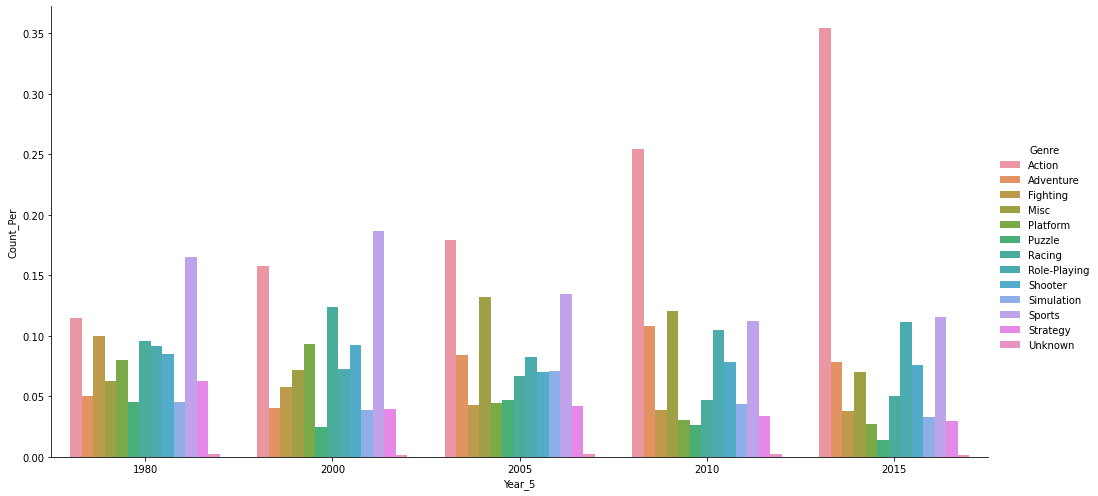

In [316]:
# Group 'years' together using custom function 
df['Year_5'] = df['Year'].apply(group_by_5year)

# Group by re-grouped Year column 
year_genre_df = df.groupby(by=['Year_5','Genre']).count().reset_index()

# Get % of each Genre's game released in each year 
temp = year_genre_df.groupby(by=['Year_5']).sum()
temp = temp.rename({'Total_Sales':'Total_Count'}, axis=1)
year_genre_df = year_genre_df.merge(temp['Total_Count'],how='left', on='Year_5')
year_genre_df['Count_Per'] = year_genre_df['Total_Sales'] / year_genre_df['Total_Count']

# Visualize
sns.catplot(x="Year_5", y="Count_Per", hue="Genre", kind="bar", data=year_genre_df, height=7, aspect=2)
plt.show()

## 최근 10년 게임 출고량 & 출시량

최근 10년간 장르별 게임 출고량과 출시량

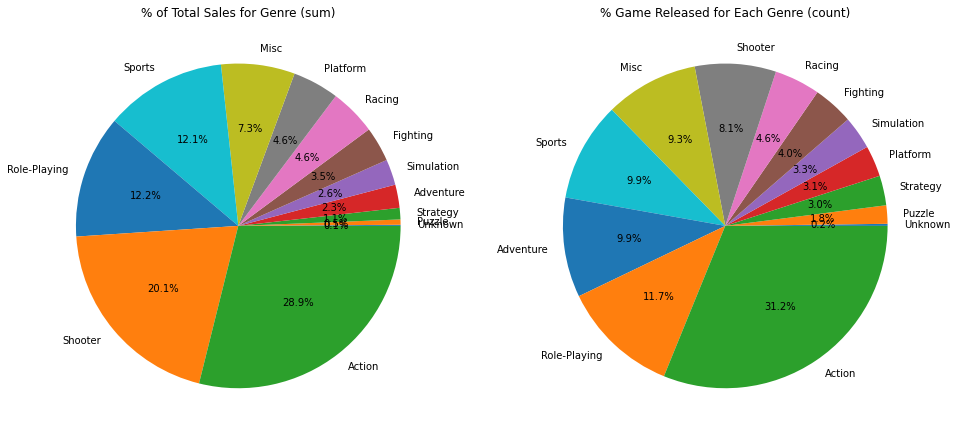

In [317]:
recent_10y_df = df[df['Year']>2010]
# group by genre, sum/count the values
genre_group_sum_df = recent_10y_df.groupby(by=['Genre']).sum().sort_values(by=['Total_Sales']).reset_index()
genre_group_count_df = recent_10y_df.groupby(by=['Genre']).count().sort_values(by=['Total_Sales']).reset_index()
genre_group_mean_df = recent_10y_df.groupby(by=['Genre']).mean().sort_values(by=['Total_Sales']).reset_index()

# Visualize
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,16)) 

# Genre_Sale / Total_Sale -> sum
ax1.pie(genre_group_sum_df['Total_Sales'],labels=genre_group_sum_df['Genre'], autopct='%1.1f%%')
ax1.set_title('% of Total Sales for Genre (sum)')

# Genre_NumOfGame / Total_NumOfGame -> count
ax2.pie(genre_group_count_df['Total_Sales'],labels=genre_group_count_df['Genre'],autopct='%1.1f%%')
ax2.set_title('% Game Released for Each Genre (count)')

plt.show() 

# 지역에 따라서 선호하는 게임 장르가 다른가?
지역별 게임시장 규모가 다르므로, 지역별 선호 장르를 파악하여 전체 시장 규모와 함께 고려함   



## 역대 모든 게임


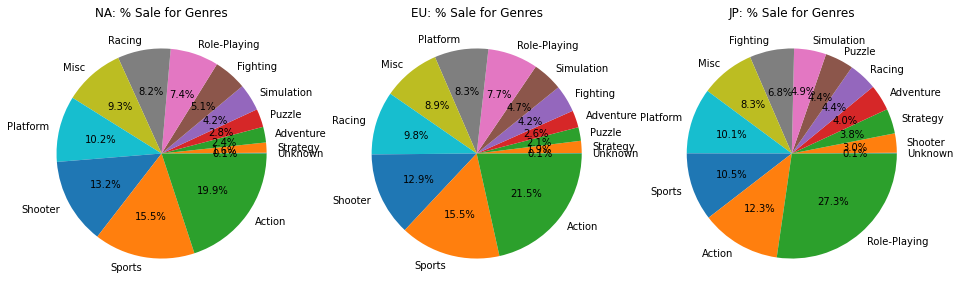

In [318]:
fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

genre_group_df = df.groupby(by=['Genre']).sum().sort_values(by=['Total_Sales'])
genre_group_df = genre_group_df.drop(columns=['Year']).reset_index()


# NA_Sales / Total_Sales
genre_group_df = genre_group_df.sort_values(by=['NA_Sales'])
ax1.pie(genre_group_df['NA_Sales'], labels=genre_group_df['Genre'], autopct='%1.1f%%')
ax1.set_title('NA: % Sale for Genres')

# EU_Sales / Total_Sales
genre_group_df = genre_group_df.sort_values(by=['EU_Sales'])
ax2.pie(genre_group_df['EU_Sales'], labels=genre_group_df['Genre'],autopct='%1.1f%%')
ax2.set_title('EU: % Sale for Genres')

# JP_Sales / Total_Sales
genre_group_df = genre_group_df.sort_values(by=['JP_Sales'])
ax3.pie(genre_group_df['JP_Sales'], labels=genre_group_df['Genre'], autopct='%1.1f%%')
ax3.set_title('JP: % Sale for Genres')

plt.show() 

## 최근 10년 게임


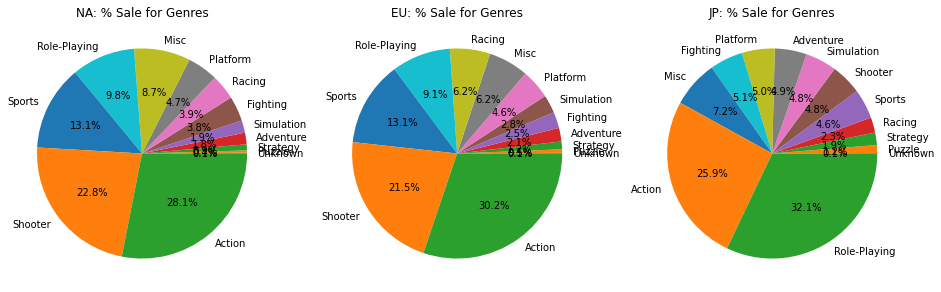

In [337]:
# 최근 10년간의 게임 데이터
recent_10y_df = df[df['Year']>2010]
fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

genre_group_df = recent_10y_df.groupby(by=['Genre']).sum().sort_values(by=['Total_Sales'])
genre_group_df = genre_group_df.drop(columns=['Year']).reset_index()

# NA_Sales / Total_Sales
genre_group_df = genre_group_df.sort_values(by=['NA_Sales'])
ax1.pie(genre_group_df['NA_Sales'], labels=genre_group_df['Genre'], autopct='%1.1f%%')
ax1.set_title('NA: % Sale for Genres')

# EU_Sales / Total_Sales
genre_group_df = genre_group_df.sort_values(by=['EU_Sales'])
ax2.pie(genre_group_df['EU_Sales'], labels=genre_group_df['Genre'],autopct='%1.1f%%')
ax2.set_title('EU: % Sale for Genres')

# JP_Sales / Total_Sales
genre_group_df = genre_group_df.sort_values(by=['JP_Sales'])
ax3.pie(genre_group_df['JP_Sales'], labels=genre_group_df['Genre'], autopct='%1.1f%%')
ax3.set_title('JP: % Sale for Genres')

plt.show() 

# 각 지역별 게임산업의 영향력
지역별 선호 장르와 함께 각 지역의 시장 규모를 함꼐 고려함


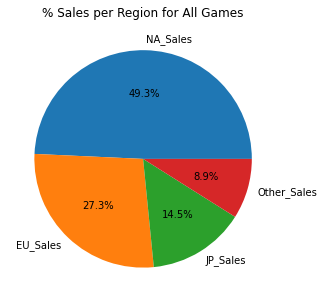

In [320]:
# 전채 게임산업의 각 지역별 비율
total_sale_sum_df = pd.DataFrame(data=[['NA_Sales'], ['EU_Sales'], ['JP_Sales'], ['Other_Sales']],columns=['Region'])
total_sale_sum_df['Sales'] = getRegionSum(df)

fig, (ax1) = plt.subplots(1,1,figsize=(5,5)) #ax1,ax2 refer to your two pies
ax1.pie(total_sale_sum_df['Sales'],labels=total_sale_sum_df['Region'], autopct='%1.1f%%')
ax1.set_title('% Sales per Region for All Games')
plt.show()



# 출고량이 높은 게임의 장르별 비율은?
성공적인 게임을 만들기 위해, 성공적이었던 게임의 장르별 비율 함께 분석함

## 역대 모든 게임

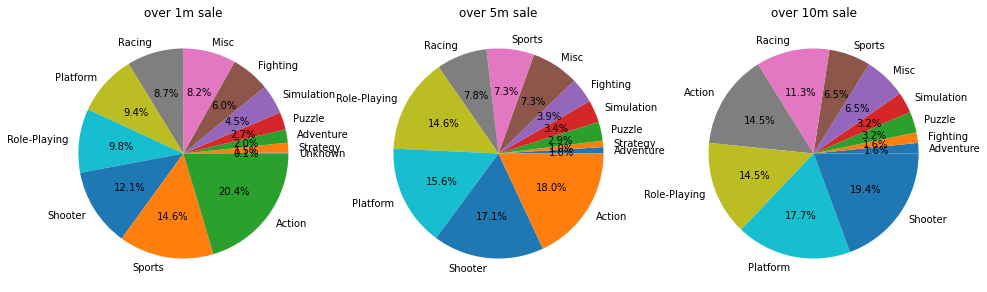

In [321]:
# Total_Sale over 1 milion 
over_1m_df = df[df['Total_Sales']>1]
over_1m_count_df = over_1m_df.groupby(by=['Genre']).count().reset_index().sort_values(by='Total_Sales')

# Total_Sale over 5 milion 
over_5m_df = df[df['Total_Sales']>5]
over_5m_count_df = over_5m_df.groupby(by=['Genre']).count().reset_index().sort_values(by='Total_Sales')

# Total_Sale over 10 milion 
over_10m_df = df[df['Total_Sales']>10]
over_10m_count_df = over_10m_df.groupby(by=['Genre']).count().reset_index().sort_values(by='Total_Sales')

# Visualize 
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,16)) 
ax1.pie(over_1m_count_df['Total_Sales'],labels=over_1m_count_df['Genre'],autopct='%1.1f%%')
ax1.set_title('over 1m sale')

ax2.pie(over_5m_count_df['Total_Sales'],labels=over_5m_count_df['Genre'],autopct='%1.1f%%')
ax2.set_title('over 5m sale')

ax3.pie(over_10m_count_df['Total_Sales'],labels=over_10m_count_df['Genre'],autopct='%1.1f%%')
ax3.set_title('over 10m sale')
plt.show()


## 최근 10년 게임

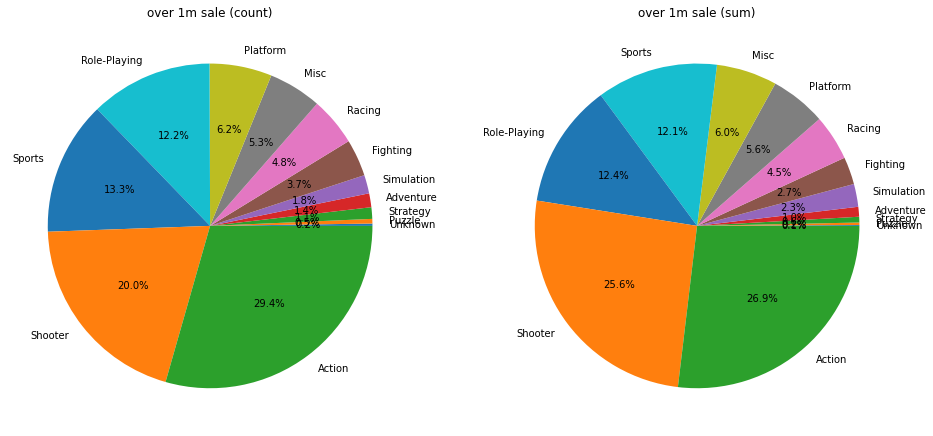

In [347]:
recent_10y_df = df[df['Year']>2010]

# Total_Sale over 1 milion 
over_1m_df = recent_10y_df[recent_10y_df['Total_Sales']>1]
over_1m_count_df = over_1m_df.groupby(by=['Genre']).count().reset_index().sort_values(by='Total_Sales')

all_count_df = over_1m_df.groupby(by=['Genre']).sum().reset_index().sort_values(by='Total_Sales')

# Visualize 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,16)) 
ax1.pie(over_1m_count_df['Total_Sales'],labels=over_1m_count_df['Genre'],autopct='%1.1f%%')
ax1.set_title('over 1m sale (count)')

ax2.pie(all_count_df['Total_Sales'],labels=all_count_df['Genre'],autopct='%1.1f%%')
ax2.set_title('over 1m sale (sum)')
plt.show()


**장르별 출고량 1m 이상 비율**

In [323]:
Total_Count = recent_10y_df.groupby('Genre').count()
Total_Count['Total_Count'] = Total_Count['Total_Sales']

over_1m_count_df = over_1m_count_df.merge(Total_Count['Total_Count'],how='left',on='Genre')  
over_1m_count_df['1m_per'] = over_1m_count_df['Total_Sales'] / over_1m_count_df['Total_Count']
over_1m_count_df = over_1m_count_df.sort_values(by='1m_per')
over_1m_count_df[['Genre','Total_Sales','Total_Count','1m_per']]

,Genre,Total_Sales,Total_Count,1m_per
3,Adventure,6,386,0.015544
1,Puzzle,2,71,0.028169
2,Strategy,5,115,0.043478
4,Simulation,8,128,0.062500
7,Misc,23,361,0.063712
5,Fighting,16,156,0.102564
12,Action,128,1211,0.105698
9,Role-Playing,53,455,0.116484
6,Racing,21,177,0.118644
0,Unknown,1,8,0.125000


# 출고량이 높은 게임의 각 나라별 출고량은 전체 수준과 비슷한가?
인기있는 게임에 경우 평균과 다르게 각 지역의 출고량이 달라지는지 판단

## 역대 모든 게임

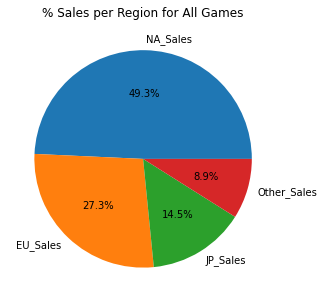

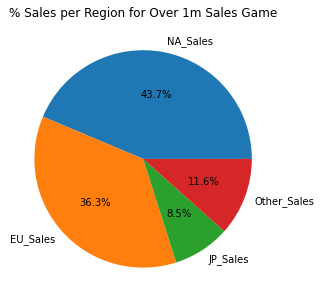

In [324]:
# 전채 게임산업의 각 지역별 비율
total_sale_sum_df = pd.DataFrame(data=[['NA_Sales'], ['EU_Sales'], ['JP_Sales'], ['Other_Sales']],columns=['Region'])
total_sale_sum_df['Sales'] = getRegionSum(df)

fig, (ax1) = plt.subplots(1,1,figsize=(5,5)) #ax1,ax2 refer to your two pies
ax1.pie(total_sale_sum_df['Sales'],labels=total_sale_sum_df['Region'], autopct='%1.1f%%')
ax1.set_title('% Sales per Region for All Games')
plt.show()

total_sale_sum_df['Sales'] = getRegionSum(over_1m_df)
fig, (ax1) = plt.subplots(1,1,figsize=(5,5)) 
ax1.pie(total_sale_sum_df['Sales'],labels=total_sale_sum_df['Region'], autopct='%1.1f%%')
ax1.set_title('% Sales per Region for Over 1m Sales Game')

plt.show()


## 최근 10년 게임

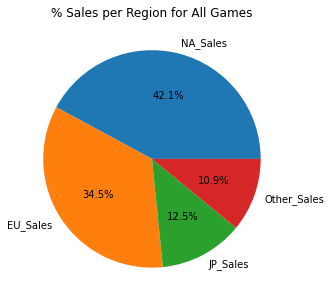

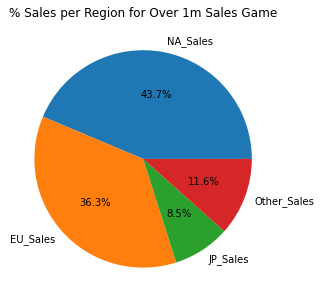

In [325]:
total_sale_sum_df = pd.DataFrame(data=[['NA_Sales'], ['EU_Sales'], ['JP_Sales'], ['Other_Sales']],columns=['Region'])
total_sale_sum_df['Sales'] = getRegionSum(recent_10y_df)

fig, (ax1) = plt.subplots(1,1,figsize=(5,5)) #ax1,ax2 refer to your two pies
ax1.pie(total_sale_sum_df['Sales'],labels=total_sale_sum_df['Region'], autopct='%1.1f%%')
ax1.set_title('% Sales per Region for All Games')
plt.show()


total_sale_sum_df['Sales'] = getRegionSum(over_1m_df)
fig, (ax1) = plt.subplots(1,1,figsize=(5,5)) 
ax1.pie(total_sale_sum_df['Sales'],labels=total_sale_sum_df['Region'], autopct='%1.1f%%')
ax1.set_title('% Sales per Region for Over 1m Sales Game')

plt.show()

# Publisher의 독점률이 낮은 장르는?
한 기업에 의한 독점이 낮을수록 중소기업에게 기회가 높다 판단.    


In [326]:
recent_10y_df = df[df['Year']>2010]
# 각 Publisher의 Sale 총합과 발매 게임 수 총합
pub_sum = recent_10y_df[recent_10y_df['Genre']=='Action'].groupby('Publisher').sum()
pub_count = recent_10y_df[recent_10y_df['Genre']=='Action'].groupby('Publisher').count()
pub_sum['Total_Count'] = pub_count['Total_Sales']
pub_sum = pub_sum[['Total_Sales','Total_Count']]

# Action 장르에서 Publisher가 차지하는 비중 
pub_sum['Sales_Per'] = pub_sum['Total_Sales'] / pub_sum['Total_Sales'].sum()
pub_sum['Count_Per'] = pub_sum['Total_Count'] / pub_sum['Total_Count'].sum()
pub_sum.sort_values('Sales_Per').tail()

,Total_Sales,Total_Count,Sales_Per,Count_Per
Publisher,,,,
Sony Computer Entertainment,36.08,36,0.065070,0.029777
Electronic Arts,37.67,44,0.067938,0.036394
Take-Two Interactive,56.40,6,0.101717,0.004963
Ubisoft,72.52,68,0.130789,0.056245
Warner Bros. Interactive Entertainment,80.67,113,0.145488,0.093466


In [327]:
# 각 Publisher의 Sale 총합과 발매 게임 수 총합
pub_sum = recent_10y_df[recent_10y_df['Genre']=='Shooter'].groupby('Publisher').sum()
pub_count = recent_10y_df[recent_10y_df['Genre']=='Shooter'].groupby('Publisher').count()
pub_sum['Total_Count'] = pub_count['Total_Sales']
pub_sum = pub_sum[['Total_Sales','Total_Count']]

# Shooter 장르에서 Publisher가 차지하는 비중 
pub_sum['Sales_Per'] = pub_sum['Total_Sales'] / pub_sum['Total_Sales'].sum()
pub_sum['Count_Per'] = pub_sum['Total_Count'] / pub_sum['Total_Count'].sum()
pub_sum.sort_values('Sales_Per').tail()

,Total_Sales,Total_Count,Sales_Per,Count_Per
Publisher,,,,
Take-Two Interactive,25.62,35,0.066511,0.111465
Ubisoft,29.79,23,0.077336,0.073248
Microsoft Game Studios,31.96,9,0.082970,0.028662
Electronic Arts,64.85,41,0.168354,0.130573
Activision,158.74,55,0.412098,0.175159


In [328]:
# 각 Publisher의 Sale 총합과 발매 게임 수 총합
pub_sum = recent_10y_df[recent_10y_df['Genre']=='Sports'].groupby('Publisher').sum()
pub_count = recent_10y_df[recent_10y_df['Genre']=='Sports'].groupby('Publisher').count()
pub_sum['Total_Count'] = pub_count['Total_Sales']
pub_sum = pub_sum[['Total_Sales','Total_Count']]

# Sports 장르에서 Publisher가 차지하는 비중 
pub_sum['Sales_Per'] = pub_sum['Total_Sales'] / pub_sum['Total_Sales'].sum()
pub_sum['Count_Per'] = pub_sum['Total_Count'] / pub_sum['Total_Count'].sum()
pub_sum.sort_values('Sales_Per').tail()

,Total_Sales,Total_Count,Sales_Per,Count_Per
Publisher,,,,
Sony Computer Entertainment,5.19,13,0.022346,0.033854
Konami Digital Entertainment,10.75,49,0.046284,0.127604
Sega,11.77,18,0.050676,0.046875
Take-Two Interactive,48.26,59,0.207784,0.153646
Electronic Arts,131.83,108,0.567597,0.281250


In [335]:
# 각 Publisher의 Sale 총합과 발매 게임 수 총합
pub_sum = recent_10y_df[recent_10y_df['Genre']=='Role-Playing'].groupby('Publisher').sum()
pub_count = recent_10y_df[recent_10y_df['Genre']=='Role-Playing'].groupby('Publisher').count()
pub_sum['Total_Count'] = pub_count['Total_Sales']
pub_sum = pub_sum[['Total_Sales','Total_Count']]

# Role-Playing 장르에서 Publisher가 차지하는 비중 
pub_sum['Sales_Per'] = pub_sum['Total_Sales'] / pub_sum['Total_Sales'].sum()
pub_sum['Count_Per'] = pub_sum['Total_Count'] / pub_sum['Total_Count'].sum()
pub_sum.sort_values('Sales_Per').tail()

,Total_Sales,Total_Count,Sales_Per,Count_Per
Publisher,,,,
Electronic Arts,17.20,15,0.073167,0.033040
Square Enix,26.69,51,0.113536,0.112335
Namco Bandai Games,27.92,72,0.118768,0.158590
Bethesda Softworks,35.44,9,0.150757,0.019824
Nintendo,65.68,29,0.279394,0.063877


# 몇개의 플랫폼을 타겟해야 하는가
몇개의 플랫폼에 게임을 출시해야 하는가, 출시 플랫폼 수 별 평균 출고량 분석

## 역대 모든 게임

In [330]:
# Each game Total_Sale
platform_sum_df = df.groupby(by=['Name']).sum()
# Each game number of platform 
platform_count_df = df.groupby(by=['Name']).count()
num_platform = platform_count_df['Platform']

platform_sum_df['Platform_count'] = num_platform
platform_sum_df.groupby(by=['Platform_count']).mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_5
Platform_count,,,,,,,
1,1977.075247,0.221094,0.118404,0.112338,0.033648,0.485484,2000.993921
2,3938.567909,0.536312,0.245413,0.140559,0.080000,1.002284,4007.020639
3,5916.636620,0.846817,0.517465,0.080535,0.172282,1.617099,6018.021127
4,7875.053004,1.496007,0.717986,0.062756,0.299541,2.576290,8023.233216
5,9809.661972,2.056690,1.399789,0.100563,0.498803,4.055845,10040.704225
6,11962.840909,2.258182,1.469205,0.090795,0.631932,4.450114,12040.965909
7,13814.312500,2.540000,2.252500,0.064687,0.958125,5.815312,14052.187500
8,15005.692308,3.000000,3.046154,0.059231,0.935385,7.040769,16068.846154
9,17586.250000,4.490000,4.272500,0.077500,1.535000,10.375000,18070.000000


## 최근 10년 게임

In [331]:
game_after_2010 = df[df['Year']>2010]

# Each game Total_Sale
platform_sum_df = game_after_2010.groupby(by=['Name']).sum()
# Each game number of platform 
platform_count_df = game_after_2010.groupby(by=['Name']).count()
num_platform = platform_count_df['Platform']


platform_sum_df['Platform_count'] = num_platform
platform_sum_df.groupby(by=['Platform_count']).mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_5
Platform_count,,,,,,,
1,2012.715278,0.128460,0.095335,0.099785,0.027456,0.351035,2011.098485
2,4026.099715,0.248148,0.168547,0.112336,0.060399,0.589430,4022.350427
3,6039.531818,0.679227,0.588273,0.094864,0.189182,1.551545,6035.000000
4,8052.630137,1.735068,0.995342,0.068630,0.376849,3.175890,8045.205479
5,10067.415385,2.014000,1.979077,0.152154,0.616769,4.762000,10057.692308
6,12077.560000,2.612400,1.872800,0.154800,0.603600,5.243600,12064.400000
7,14090.000000,1.844615,2.072308,0.086923,0.591538,4.595385,14078.076923
8,16109.750000,1.798750,4.026250,0.095000,1.116250,7.036250,16086.250000
9,18117.000000,3.625000,7.640000,0.140000,2.105000,13.510000,18090.000000


# 어느 플랫폼으로 출고해야하는가
어느 플랫폼에 게임을 출시해야 하는가, 플랫폼 수 별 시장 점유율 분석

## 최근 10년 게임

In [332]:
plat_count_df = df[df['Year']>2010].groupby('Platform').count()
plat_count_df

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_5
Platform,,,,,,,,,,
3DS,500,500,500,499,500,500,500,500,500,500
DS,189,189,189,187,189,189,189,189,189,189
PC,371,371,371,368,371,371,371,371,371,371
PS2,7,7,7,7,7,7,7,7,7,7
PS3,705,705,705,705,705,705,705,705,705,705
PS4,336,336,336,336,336,336,336,336,336,336
PSP,312,312,312,312,312,312,312,312,312,312
PSV,412,412,412,410,412,412,412,412,412,412
Wii,198,198,198,198,198,198,198,198,198,198


**각 플랫폼 출시량**

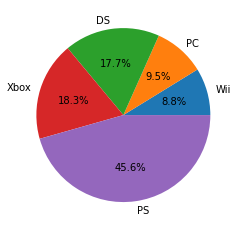

In [333]:
plat_count_df = df[df['Year']>2010].groupby('Platform').count()
plat_count_df['Total_Per'] = plat_count_df['Total_Sales'] / plat_count_df['Total_Sales'].sum()

platform_sum = []

platform_sum.append(plat_count_df.loc[['3DS','DS']].Total_Sales.sum())
platform_sum.append(plat_count_df.loc[['PS2','PS3','PS4','PSP','PSV']].Total_Sales.sum())
platform_sum.append(plat_count_df.loc[['Wii','WiiU']].Total_Sales.sum())
platform_sum.append(plat_count_df.loc[['PC']].Total_Sales.sum())
platform_sum.append(plat_count_df.loc[['X360','XOne']].Total_Sales.sum())

platform_sum_df = pd.DataFrame(data=[['DS'], ['PS'], ['Wii'], ['PC'],['Xbox']],columns=['Platform_Series'])
platform_sum_df['Total_Sales'] = platform_sum
platform_sum_df = platform_sum_df.sort_values(by='Total_Sales')
plt.pie(platform_sum_df['Total_Sales'],labels=platform_sum_df['Platform_Series'], autopct='%1.1f%%')
plt.show()

**각 플랫폼 출고량**

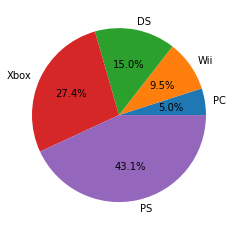

In [334]:
plat_count_df = df[df['Year']>2010].groupby('Platform').sum()
plat_count_df['Total_Per'] = plat_count_df['Total_Sales'] / plat_count_df['Total_Sales'].sum()

platform_sum = []

platform_sum.append(plat_count_df.loc[['3DS','DS']].Total_Sales.sum())
platform_sum.append(plat_count_df.loc[['PS2','PS3','PS4','PSP','PSV']].Total_Sales.sum())
platform_sum.append(plat_count_df.loc[['Wii','WiiU']].Total_Sales.sum())
platform_sum.append(plat_count_df.loc[['PC']].Total_Sales.sum())
platform_sum.append(plat_count_df.loc[['X360','XOne']].Total_Sales.sum())

platform_sum_df = pd.DataFrame(data=[['DS'], ['PS'], ['Wii'], ['PC'],['Xbox']],columns=['Platform_Series'])
platform_sum_df['Total_Sales'] = platform_sum
platform_sum_df = platform_sum_df.sort_values(by='Total_Sales')
plt.pie(platform_sum_df['Total_Sales'],labels=platform_sum_df['Platform_Series'], autopct='%1.1f%%')
plt.show()

# 결론:
**최근 10년간의 데이터를 기준으로 볼때 우리 회사의 다음 분기 게임은:** 

전체 게임 산업 장르중 가장 인기가 많고, 3개 지역 모두에서 인기 있으며, 한 기업에 의한 독점이 비교적 적은 **액션 장르**.  

각 플랫폼별 출시하는 비용이 있으나, 플랫폼에 수와 출고량은 비례하기에    
현재 제일 영향력이 높은 **3개의 플랫폼; PlayStation, Xbox, PC**를 대상으로 개발을 진행하여야 한다. 
